In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime

In [2]:
current_time = datetime.now()

# Format the time as "Hour:Minute AM/PM"
formatted_time = current_time.strftime("%I:%M %p")

print("Formatted time:", formatted_time)


Formatted time: 04:55 PM


In [3]:
# read
# n_LF, n_HF, rel_error = np.loadtxt('error_function_11P_MF-Box.txt', unpack=True, usecols=(0,1,2))
n_LF, n_HF, rel_error = np.loadtxt('error_function_goku_pre_frontera.txt', unpack=True, usecols=(0,1,2))

In [4]:
rel_error.shape

(2673,)

In [5]:
def grid_error(n_LF, n_HF, rel_error, n_LF_max = 270, n_HF_max = 9, len_slice = 3):
    X_grid = int(n_LF_max / len_slice)
    Y_grid = int(n_HF_max / len_slice)
    grid_error = np.ones((X_grid, Y_grid))
    n_sample = np.ones((X_grid, Y_grid))
    x = n_HF/len_slice
    y = n_LF/len_slice
    for i in range(len(x)):
        i_y = int(x[i]) - 1
        i_x = int(y[i]) - 1
        if grid_error[i_x, i_y] != 1:
            grid_error[i_x, i_y] += rel_error[i]
            n_sample[i_x, i_y] += 1
        else:
            grid_error[i_x, i_y] = rel_error[i]

    grid_error = grid_error/n_sample
    return grid_error

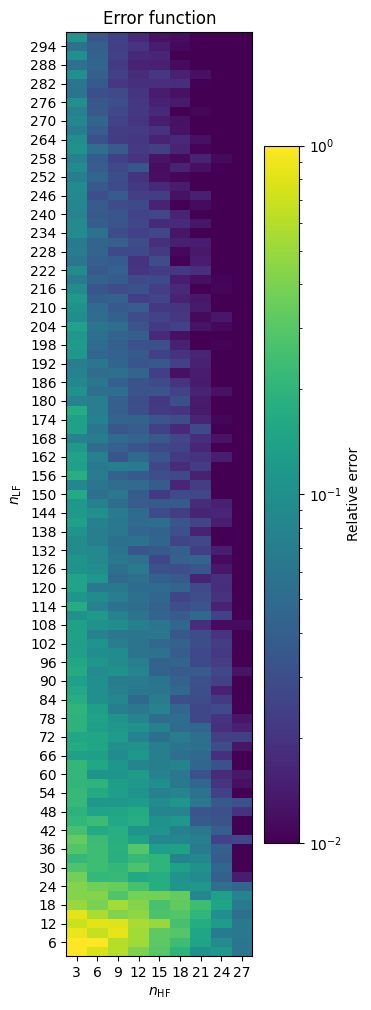

In [6]:
n_LF_max = 297
n_HF_max = 27
len_slice = 3

y = np.linspace(len_slice, n_LF_max, n_LF_max//len_slice)  # Replace with your desired range and resolution
x = np.linspace(len_slice, n_HF_max, n_HF_max//len_slice)  # Replace with your desired range and resolution
X, Y = np.meshgrid(x, y)

# create griddata
Z = grid_error(n_LF, n_HF, rel_error, len_slice=len_slice, n_LF_max=n_LF_max, n_HF_max=n_HF_max)

# Create a colormap to map function values to colors
cmap = plt.get_cmap('viridis')
vmin = 1e-2
vmax = 1

# Create a plot
plt.figure(figsize=(3, 12))
plt.pcolormesh(X, Y, Z, cmap=cmap, norm=matplotlib.colors.LogNorm(vmin=vmin, vmax=vmax))
plt.colorbar(label='Relative error')
plt.title('Error function')
plt.xlabel(r'$n_\mathrm{HF}$')
plt.ylabel(r'$n_\mathrm{LF}$')
xticks = np.arange(3, n_HF_max + 1, 3)
plt.xticks(xticks)
y_ticks = np.arange(6, n_LF_max + 1, 6)
plt.yticks(y_ticks)
plt.show()


In [7]:
Z.shape

(99, 9)

In [8]:
X.shape

(99, 9)

In [9]:
pairs_done = []
for row in range(Z.shape[0]):
    for col in range(Z.shape[1]):
        if Z[row, col] != 1:
            pairs_done.append([3*(row+1), 3*(col+1)])
            

In [10]:
len(pairs_done)

891

In [11]:
pairs_done

[[3, 3],
 [3, 6],
 [3, 9],
 [3, 12],
 [3, 15],
 [3, 18],
 [3, 21],
 [3, 24],
 [3, 27],
 [6, 3],
 [6, 6],
 [6, 9],
 [6, 12],
 [6, 15],
 [6, 18],
 [6, 21],
 [6, 24],
 [6, 27],
 [9, 3],
 [9, 6],
 [9, 9],
 [9, 12],
 [9, 15],
 [9, 18],
 [9, 21],
 [9, 24],
 [9, 27],
 [12, 3],
 [12, 6],
 [12, 9],
 [12, 12],
 [12, 15],
 [12, 18],
 [12, 21],
 [12, 24],
 [12, 27],
 [15, 3],
 [15, 6],
 [15, 9],
 [15, 12],
 [15, 15],
 [15, 18],
 [15, 21],
 [15, 24],
 [15, 27],
 [18, 3],
 [18, 6],
 [18, 9],
 [18, 12],
 [18, 15],
 [18, 18],
 [18, 21],
 [18, 24],
 [18, 27],
 [21, 3],
 [21, 6],
 [21, 9],
 [21, 12],
 [21, 15],
 [21, 18],
 [21, 21],
 [21, 24],
 [21, 27],
 [24, 3],
 [24, 6],
 [24, 9],
 [24, 12],
 [24, 15],
 [24, 18],
 [24, 21],
 [24, 24],
 [24, 27],
 [27, 3],
 [27, 6],
 [27, 9],
 [27, 12],
 [27, 15],
 [27, 18],
 [27, 21],
 [27, 24],
 [27, 27],
 [30, 3],
 [30, 6],
 [30, 9],
 [30, 12],
 [30, 15],
 [30, 18],
 [30, 21],
 [30, 24],
 [30, 27],
 [33, 3],
 [33, 6],
 [33, 9],
 [33, 12],
 [33, 15],
 [33, 18],
 [33

In [12]:
def get_pairs_done(output_file):
    pairs_done = np.loadtxt(output_file, usecols=(0,1))
    return pairs_done

In [13]:
pairs_done = get_pairs_done('error_function.txt')

In [14]:
pairs_done

array([[ 12.,   9.],
       [ 12.,  12.],
       [ 12.,   6.],
       ...,
       [270.,   3.],
       [267.,   3.],
       [ 12.,   3.]])

In [15]:
pairs_done

array([[ 12.,   9.],
       [ 12.,  12.],
       [ 12.,   6.],
       ...,
       [270.,   3.],
       [267.,   3.],
       [ 12.,   3.]])

In [16]:
# define the error function 2 param modes
def error_function(n_LF, n_HF):
    eta = 11.20294568777112
    '''rho = pm.Uniform("rho", lower=0, upper=10)
    beta_L = pm.Uniform("beta_L", lower=0, upper=3)
    beta_H = pm.Uniform("beta_H", lower=0, upper=6)'''
    rho = 34422.595850790254
    beta_L = 1.1406839520015446
    beta_H = 4.145389781446169
    # rho_2 = pm.Uniform("rho_2", lower=0, upper=1)
    beta_H2 = 2.713544143928366
    # alpha_1 = pm.Normal("alpha_1", mu=10, sigma=5)
    alpha_L = 7.8176404049598816
    alpha_1 = 18.553167013696203
    alpha_2 = 7.5153891398955235

    sigma_lg_Phi = 0.21450697746101002   # standard deviation of the log of the error function
    # return 10**(np.log10(eta) + np.log10((rho / (n_LF**(beta_L) * n_HF**(beta_H)) + (1 - rho) / (alpha + n_HF**(beta_H2)))))
    lg_Phi = np.log10(eta) + np.log10(rho / ( (n_LF + n_HF) * (n_LF + alpha_L)**(beta_L-1) * (n_HF + alpha_1)**(beta_H-1) ) + 1 / (alpha_2 + n_HF)**(beta_H2))
    
    mode_Phi = 10**lg_Phi * np.exp(-sigma_lg_Phi**2 * (np.log(10))**2)
    mean_Phi = 10**lg_Phi * np.exp(1/2 * (sigma_lg_Phi * np.log(10))**2)
    median_Phi = 10**lg_Phi
    return mean_Phi

In [17]:
# naive lg_Phi
def error_function_old(n_LF, n_HF):
    eta = 0.7947996701660118
    '''rho = pm.Uniform("rho", lower=0, upper=10)
    beta_L = pm.Uniform("beta_L", lower=0, upper=3)
    beta_H = pm.Uniform("beta_H", lower=0, upper=6)'''
    rho = 5.608704513443982
    beta_L = 1.2974943261842817
    beta_H = 1.5156154430804256

    sigma_lg_Phi = 0.30695835929339044	   # standard deviation of the log of the error function
    # return 10**(np.log10(eta) + np.log10((rho / (n_LF**(beta_L) * n_HF**(beta_H)) + (1 - rho) / (alpha + n_HF**(beta_H2)))))
    lg_Phi = np.log10(eta) + np.log10(rho / (n_LF**(beta_L)) + 1 / (n_HF**(beta_H)))
    
    mode_Phi = 10**lg_Phi * np.exp(-sigma_lg_Phi**2 * (np.log(10))**2)
    mean_Phi = 10**lg_Phi * np.exp(1/2 * (sigma_lg_Phi * np.log(10))**2)
    median_Phi = 10**lg_Phi
    return mean_Phi

In [18]:
# # define the error function 7 par means
# def error_function(n_LF, n_HF):
#     eta = 10.912	
#     '''rho = pm.Uniform("rho", lower=0, upper=10)
#     beta_L = pm.Uniform("beta_L", lower=0, upper=3)
#     beta_H = pm.Uniform("beta_H", lower=0, upper=6)'''
#     rho = 56564.792
#     beta_L = 1.077	
#     beta_H = 4.231	
#     # rho_2 = pm.Uniform("rho_2", lower=0, upper=1)
#     # beta_H2 = 3.486
#     # alpha_1 = pm.Normal("alpha_1", mu=10, sigma=5)
#     alpha_L = 8.261	
#     alpha_1 = 18.469
#     alpha_2 = 9.758

#     sigma_lg_Phi = 0.215	   # standard deviation of the log of the error function
#     # return 10**(np.log10(eta) + np.log10((rho / (n_LF**(beta_L) * n_HF**(beta_H)) + (1 - rho) / (alpha + n_HF**(beta_H2)))))
#     lg_Phi = np.log10(eta) + np.log10(rho / ( (n_LF + n_HF) * (n_LF + alpha_L)**(beta_L-1) * (n_HF + alpha_1)**(beta_H-1) ) + 1 / (alpha_2 + n_HF)**(beta_H))
    
#     mode_Phi = 10**lg_Phi * np.exp(-sigma_lg_Phi**2 * (np.log(10))**2)
#     mean_Phi = 10**lg_Phi * np.exp(1/2 * (sigma_lg_Phi * np.log(10))**2)
#     median_Phi = 10**lg_Phi
#     return mean_Phi

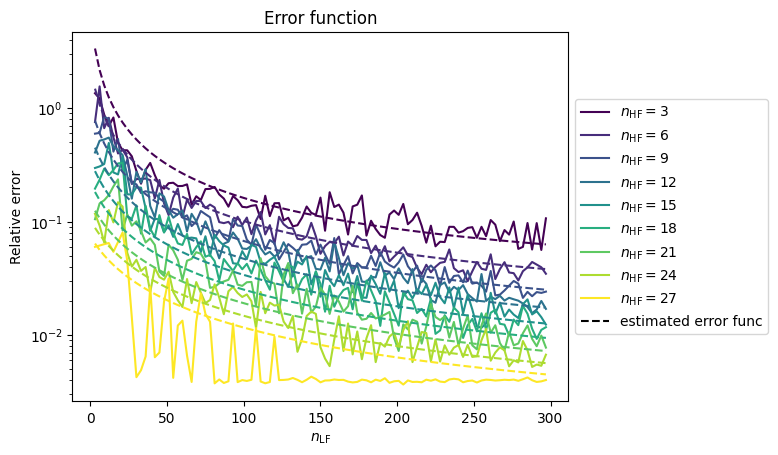

In [19]:
# distinct colors
colors = plt.cm.viridis(np.linspace(0, 1, len(X[0])))

# plot the error function as curves
for i in range(len(X[0])):
    plt.plot(Y[:,0], Z[:, i], color=colors[i],label=r'$n_\mathrm{HF}=$' + str(int(X[0, i])))
# plot the error function as curves for different n_HF
for i in range(len(X[0])):
    plt.plot(Y[:,0], error_function(Y[:,0], X[0,i]), '--', color=colors[i])

plt.plot([],[], 'k--', label='estimated error func')
# adjust the legend location to outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend()
plt.yscale('log')
# plt.ylim(1e-3, 2)
plt.xlabel(r'$n_\mathrm{LF}$')
plt.ylabel('Relative error')
plt.title('Error function')
plt.show()

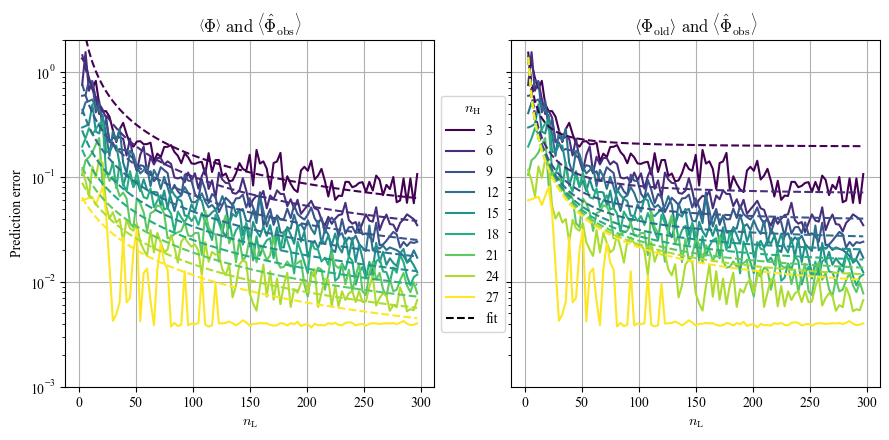

In [23]:
plt.rcParams['font.family'] = 'Times New Roman'

# Set math font style
plt.rcParams['mathtext.fontset'] = 'cm'

fig, axes = plt.subplots(1, 2, figsize=(9, 4.5), sharex=True)

# Plot in the first panel
for i in range(len(X[0])):
    axes[0].plot(Y[:,0], Z[:, i], color=colors[i],label= str(int(X[0, i])))
# plot the error function as curves for different n_HF
for i in range(len(X[0])):
    axes[0].plot(Y[:,0], error_function(Y[:,0], X[0,i]), '--', color=colors[i])
axes[0].set_yscale('log')
axes[0].set_xlabel(r'$n_\mathrm{L}$')
axes[0].set_ylabel('Prediction error')
axes[0].set_title(r'$\left< \Phi\right>\ \mathrm{and}\ \left< \hat\Phi_\mathrm{obs}\right> $')
axes[0].plot([],[], 'k--', label='fit')

y_lower = 2.5e-3
y_upper = 4.5
axes[0].set_ylim(1e-3, 2)
axes[1].set_ylim(1e-3, 2)

# Plot in the second panel
# plot the error function as curves
for i in range(len(X[0])):
    axes[1].plot(Y[:,0], Z[:, i], color=colors[i],label=str(int(X[0, i])))
# plot the error function as curves for different n_HF
for i in range(len(X[0])):
    axes[1].plot(Y[:,0], error_function_old(Y[:,0], X[0,i]), '--', color=colors[i])
axes[1].set_yscale('log')
axes[1].set_xlabel(r'$n_\mathrm{L}$')
# axes[1].set_ylabel('Relative error')
axes[1].set_title(r'$\left< \Phi_\mathrm{old}\right>\ \mathrm{and}\ \left< \hat\Phi_\mathrm{obs}\right>$')
axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), title=r'$n_\mathrm{H}$')
# Add gridlines to the plot
axes[0].grid(True)
axes[1].grid(True)
axes[1].set_yticks([.01, .1, 1], [' ', ' ', ' '])
# Adjust the spacing between subplots
plt.tight_layout()
# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.21)

# Show the figure
# plt.show()
plt.savefig('error_function.pdf',bbox_inches='tight')